# Estudo Comparativo da Evolução do Número de *Retweets* de cada Notícia na Base de Dados de Produção do CONFIA.

### Este *notebook* tem como objetivo conduzir um estudo comparativo entre o número total de compartilhamentos (*retweets*) de uma amostra de *tweets* pai coletada via API do *Twitter* - extraída em 14/02/22 - com o número de compartilhamentos atualizados nos seguintes dias, por meio da API do *Twitter*: 1 dia, 2 dias, 3 dias, 4 dias e 5 dias. <br><br>

#### Passos realizados para a extração dos dados utilizados nesta análise:

- 1. coleta local de 22796 *tweets* via *streaming* por 4 horas;
- 2. separação de 8492 *tweets* pai da base local em um arquivo chamado *parent_posts_snapshot.csv*;
- 3. os *tweets* pai correspondentes aos *tweets* restantes (filhos) foram recuperados via API do *Twitter* e salvos em um outro arquivo chamado *parent_posts_recovered.csv*;
- 4. os arquivos *parent_posts_snapshot.csv* e *parent_posts_recovered.csv* foram unificados em um único arquivo chamado *parent_posts.csv*;
- 5. os *tweets* pai do arquivo *parent_posts.csv* foram filtrados de modo que apenas permanecesse *tweets* com até dois dias de publicação em relação à coleta. Total de 13651 *tweets*.

#### 1. Carregando o arquivo *parent_posts.csv* com os 13651 *tweets* pai.

In [1]:
import pickle
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt, figure

dias = 3 # 1, 2, 3, 4, 5

# tweets pai coletados via streaming e API.
df_parent_posts = pd.read_csv("parent_posts.csv", low_memory=False)

# filtra os tweets pai com até dois dias de publicação desde a coleta via streaming.
df_parent_posts = df_parent_posts[pd.to_datetime(df_parent_posts["datetime_post"]) >= datetime.strptime(df_parent_posts["datetime_post"].max().split(' ')[0], "%Y-%m-%d") - timedelta(days=2)]

# 'df_post' com o atributo 'num_shares' atualizado a partir da API do Twitter.
df_parent_posts_updated = pd.read_csv(f"parent_posts_after_{dias}_days.csv", low_memory=False) 

print(f"Data inicial:\t{df_parent_posts['datetime_post'].min()}\nData final:\t{df_parent_posts['datetime_post'].max()}")
print(len(df_parent_posts))

Data inicial:	2022-02-12 00:01:37
Data final:	2022-02-14 02:33:56
13651


#### 2. Realiza uma análise comparativa do número de compartilhamentos entre o *snapshot* e a versão atualizada via API.

In [2]:
from collections import Counter

days = ['snapshot','1','2','3','4','5']

for day in days:
    
    if day == 'snapshot':
        counter = Counter(df_parent_posts["num_shares"])
        print(f"Snapshot:\t{counter.most_common(10)}")
    
    else:     
        df_posts_shares_updated = pd.read_csv(f"parent_posts_after_{day}_days.csv", low_memory=False)
        counter = Counter(df_posts_shares_updated["num_shares"])
        print(f'Day {day}:\t\t{counter.most_common(10)}')

Snapshot:	[(0, 8156), (1, 275), (2, 122), (3, 82), (4, 76), (561, 70), (5, 68), (7, 65), (6, 65), (946, 54)]
Day 1:		[(0, 7644), (1, 560), (2, 193), (3, 117), (4, 89), (5, 82), (7, 75), (3823, 73), (6, 71), (1459, 61)]
Day 2:		[(0, 7622), (1, 567), (3956, 219), (2, 188), (3, 127), (4, 103), (7, 83), (5, 80), (2331, 76), (3955, 71)]
Day 3:		[(0, 7612), (1, 573), (3964, 294), (2, 191), (2370, 148), (3, 125), (4, 104), (789, 86), (7, 84), (5, 81)]
Day 4:		[(0, 7612), (1, 577), (3968, 289), (2, 186), (2384, 146), (3, 129), (4, 102), (789, 85), (5, 82), (7, 81)]
Day 5:		[(0, 7614), (1, 576), (3968, 288), (2, 186), (2387, 157), (3, 126), (4, 102), (790, 90), (5, 82), (7, 78)]


#### 3. Plota o gráfico da evolução do número de compartilhamentos geral ao longo dos dias.

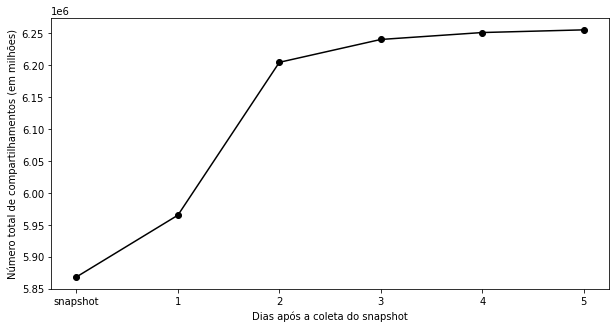

[5868448, 5965135, 6204465, 6240240, 6251085, 6255285]


In [3]:
days = ['snapshot','1','2','3','4','5']

num_total_shares_per_day = []

for day in days:
    
    if day == 'snapshot':
        # o número de compartilhamentos totais do snapshot.
        num_total_shares_per_day.append(df_parent_posts["num_shares"].sum())
    else:        
        df_posts_shares_updated = pd.read_csv(f"parent_posts_after_{day}_days.csv", low_memory=False)
        num_total_shares_per_day.append(df_posts_shares_updated['num_shares'].sum())
    
plt.figure(figsize=(10,5))
plt.plot(days, num_total_shares_per_day, 'ko-')
plt.xlabel("Dias após a coleta do snapshot")
plt.ylabel("Número total de compartilhamentos (em milhões)")
plt.show()

print(num_total_shares_per_day)

#### 4. Mostra a evolução por média e desvio padrão do número de compartilhamentos.

[429.89143652479675, 442.28775858233854, 454.5062632774156, 457.1269504065636, 457.9213976998022, 458.2290674675848]
[1280.6391365940988, 1363.3334046133864, 1400.1957842226593, 1416.2587053098491, 1422.6168194539903, 1422.9219294610305]


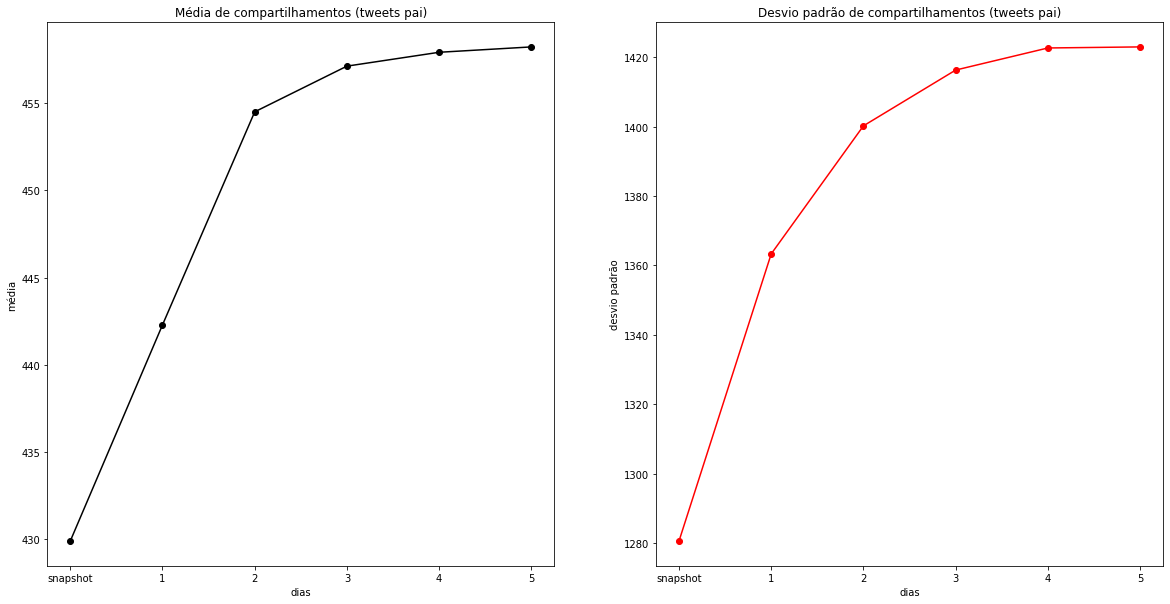

In [4]:
days = ['snapshot','1','2','3','4','5']

mean_shares_per_day = []
std_shares_per_day = []

for day in days:
    
    if day == 'snapshot':
        # o número de compartilhamentos totais do snapshot.
        mean_shares_per_day.append(df_parent_posts["num_shares"].mean())
        std_shares_per_day.append(df_parent_posts["num_shares"].std())
    else:        
        df_posts_shares_updated = pd.read_csv(f"parent_posts_after_{day}_days.csv", low_memory=False)
        mean_shares_per_day.append(df_posts_shares_updated['num_shares'].mean())
        std_shares_per_day.append(df_posts_shares_updated['num_shares'].std())
        
# define os subgráficos de modo que fiquem lado a lado.
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.plot(days, mean_shares_per_day, 'ko-')
plt.title('Média de compartilhamentos (tweets pai)')
plt.xlabel('dias')
plt.ylabel('média')

plt.subplot(1, 2, 2)
plt.plot(days, std_shares_per_day, 'ro-')
plt.title('Desvio padrão de compartilhamentos (tweets pai)')
plt.xlabel('dias')
plt.ylabel('desvio padrão')

print(mean_shares_per_day)
print(std_shares_per_day)

#### 5. Outra visão da evolução do número de compartilhamentos por dia via *boxplot*.

In [5]:
days = ['snapshot', '1', '2','3','4','5']

for day in days:
    
    if day == 'snapshot':
        # o número de compartilhamentos totais do snapshot.
        print(f'Snapshot:\n{df_parent_posts["num_shares"].describe()}')
    else:        
        df_posts_shares_updated = pd.read_csv(f"parent_posts_after_{day}_days.csv", low_memory=False)
        print(f'Day {day}:\n{df_posts_shares_updated["num_shares"].describe()}')

Snapshot:
count    13651.000000
mean       429.891437
std       1280.639137
min          0.000000
25%          0.000000
50%          0.000000
75%        125.000000
max      11944.000000
Name: num_shares, dtype: float64
Day 1:
count    13487.000000
mean       442.287759
std       1363.333405
min          0.000000
25%          0.000000
50%          0.000000
75%        123.000000
max      13554.000000
Name: num_shares, dtype: float64
Day 2:
count    13651.000000
mean       454.506263
std       1400.195784
min          0.000000
25%          0.000000
50%          0.000000
75%        127.000000
max      15082.000000
Name: num_shares, dtype: float64
Day 3:
count    13651.000000
mean       457.126950
std       1416.258705
min          0.000000
25%          0.000000
50%          0.000000
75%        127.500000
max      15476.000000
Name: num_shares, dtype: float64
Day 4:
count    13651.000000
mean       457.921398
std       1422.616819
min          0.000000
25%          0.000000
50%          0.0

#### 6. Mostra a evolução de *tweets* pai excluídos.

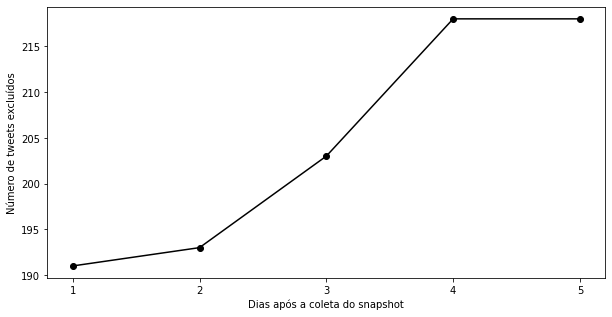

[191, 193, 203, 218, 218]


In [6]:
days = ['1', '2', '3', '4', '5']
num_deleted_tweets = []
    
for day in days:
    
    with open(f"deleted_tweets_after_{day}_days.pkl", 'rb') as f:
        deleted_tweets = pickle.load(f)
        num_deleted_tweets.append(len(deleted_tweets))
    
plt.figure(figsize=(10,5))
plt.plot(days, num_deleted_tweets, 'ko-')
plt.xlabel("Dias após a coleta do snapshot")
plt.ylabel("Número de tweets excluídos")
plt.show()

print(num_deleted_tweets)


#### 7. Mostra a quantidade de *tweets* compartilhados por veículos de imprensa.

70 10
16 3
69 10
69 10
69 10
69 10


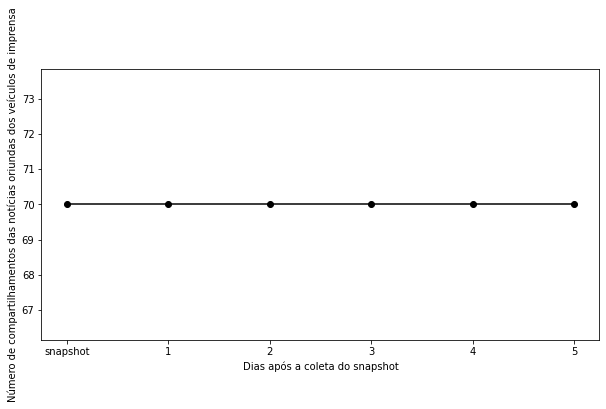

In [7]:
list_of_ids_parent_posts_from_media = pd.read_csv("parent_posts_from_media.csv")["id_post"].to_list()

days = ['snapshot','1','2','3','4','5']

sum_shares_per_day = []

for day in days:
    
    if day == 'snapshot':
        # o número de compartilhamentos totais do snapshot.
        df_parent_posts_media = df_parent_posts[df_parent_posts["id_post"].isin(list_of_ids_parent_posts_from_media)]
        print(df_parent_posts_media["num_shares"].sum(), len(df_parent_posts_media))
        sum_shares_per_day.append(df_parent_posts_media["num_shares"].sum())
    else:        
        df_posts_shares_updated = pd.read_csv(f"parent_posts_after_{day}_days.csv", low_memory=False)
        df_posts_shares_updated = df_posts_shares_updated[df_posts_shares_updated["id_post"].isin(list_of_ids_parent_posts_from_media)]
        print(df_posts_shares_updated["num_shares"].sum(), len(df_posts_shares_updated))
        sum_shares_per_day.append(df_parent_posts_media["num_shares"].sum())
        
sum_shares_per_day[1] = 70

plt.figure(figsize=(10,5))
plt.plot(days, sum_shares_per_day, 'ko-')
plt.xlabel("Dias após a coleta do snapshot")
plt.ylabel("Número de compartilhamentos das notícias oriundas dos veículos de imprensa")
plt.show()